# Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from sklearn.metrics import roc_auc_score

## Загрузка данных

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.sample(n=10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2305,52,48.80,2555.05,Male,1,No,No,No,No phone service,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
3148,4,50.85,239.55,Female,0,Yes,Yes,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,1
2254,65,90.45,5957.9,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,0
3710,16,90.70,1374.9,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,No,Electronic check,0
64,10,89.80,914.3,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,1
1117,30,40.30,1172.95,Female,1,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,1
2817,67,36.15,2434.45,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,No,No,No,No,Two year,No,Bank transfer (automatic),0
2527,30,85.15,2555.9,Female,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,1
849,40,39.30,1637.4,Female,1,Yes,No,No,No phone service,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [ ]:
dict_nul = {}

for col in feature_cols:
    dict_nul[col] = data[col][data[col].isna() == True].count()

dict_nul = pd.DataFrame(dict_nul, index=[0])
dict_nul.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Анализ данных

In [ ]:
from pylab import rcParams

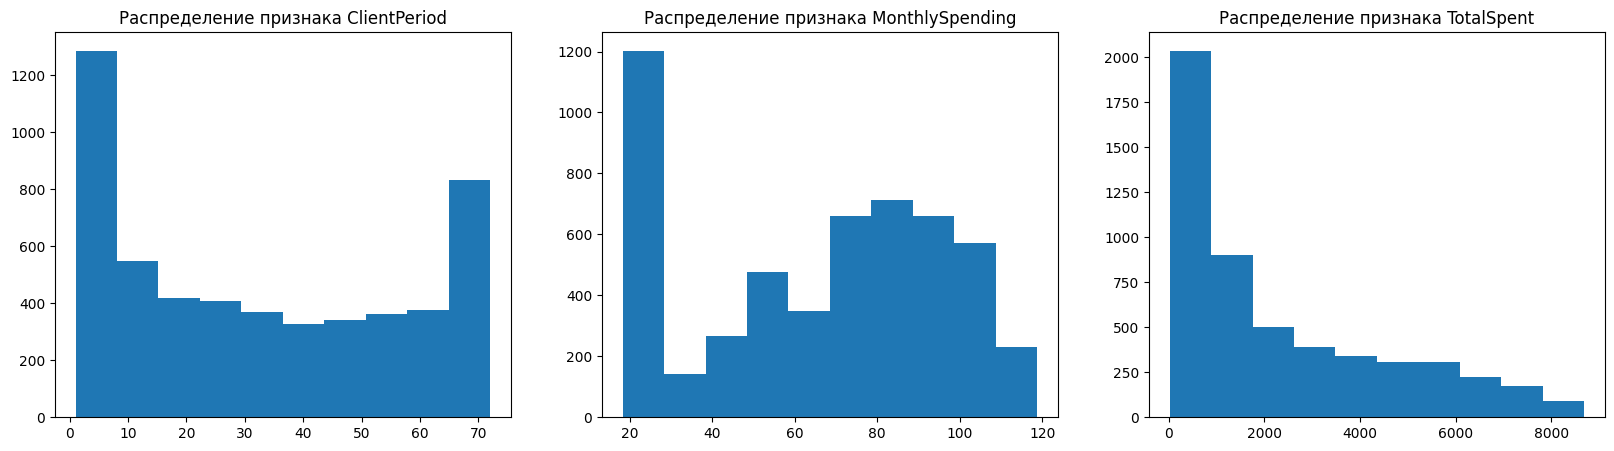

In [ ]:
rcParams['figure.figsize'] = 20,5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(data['ClientPeriod'])
ax1.set_title('Распределение признака ClientPeriod')
ax2.hist(data['MonthlySpending'])
ax2.set_title('Распределение признака MonthlySpending')
ax3.hist(data['TotalSpent'])
ax3.set_title('Распределение признака TotalSpent')

plt.show()

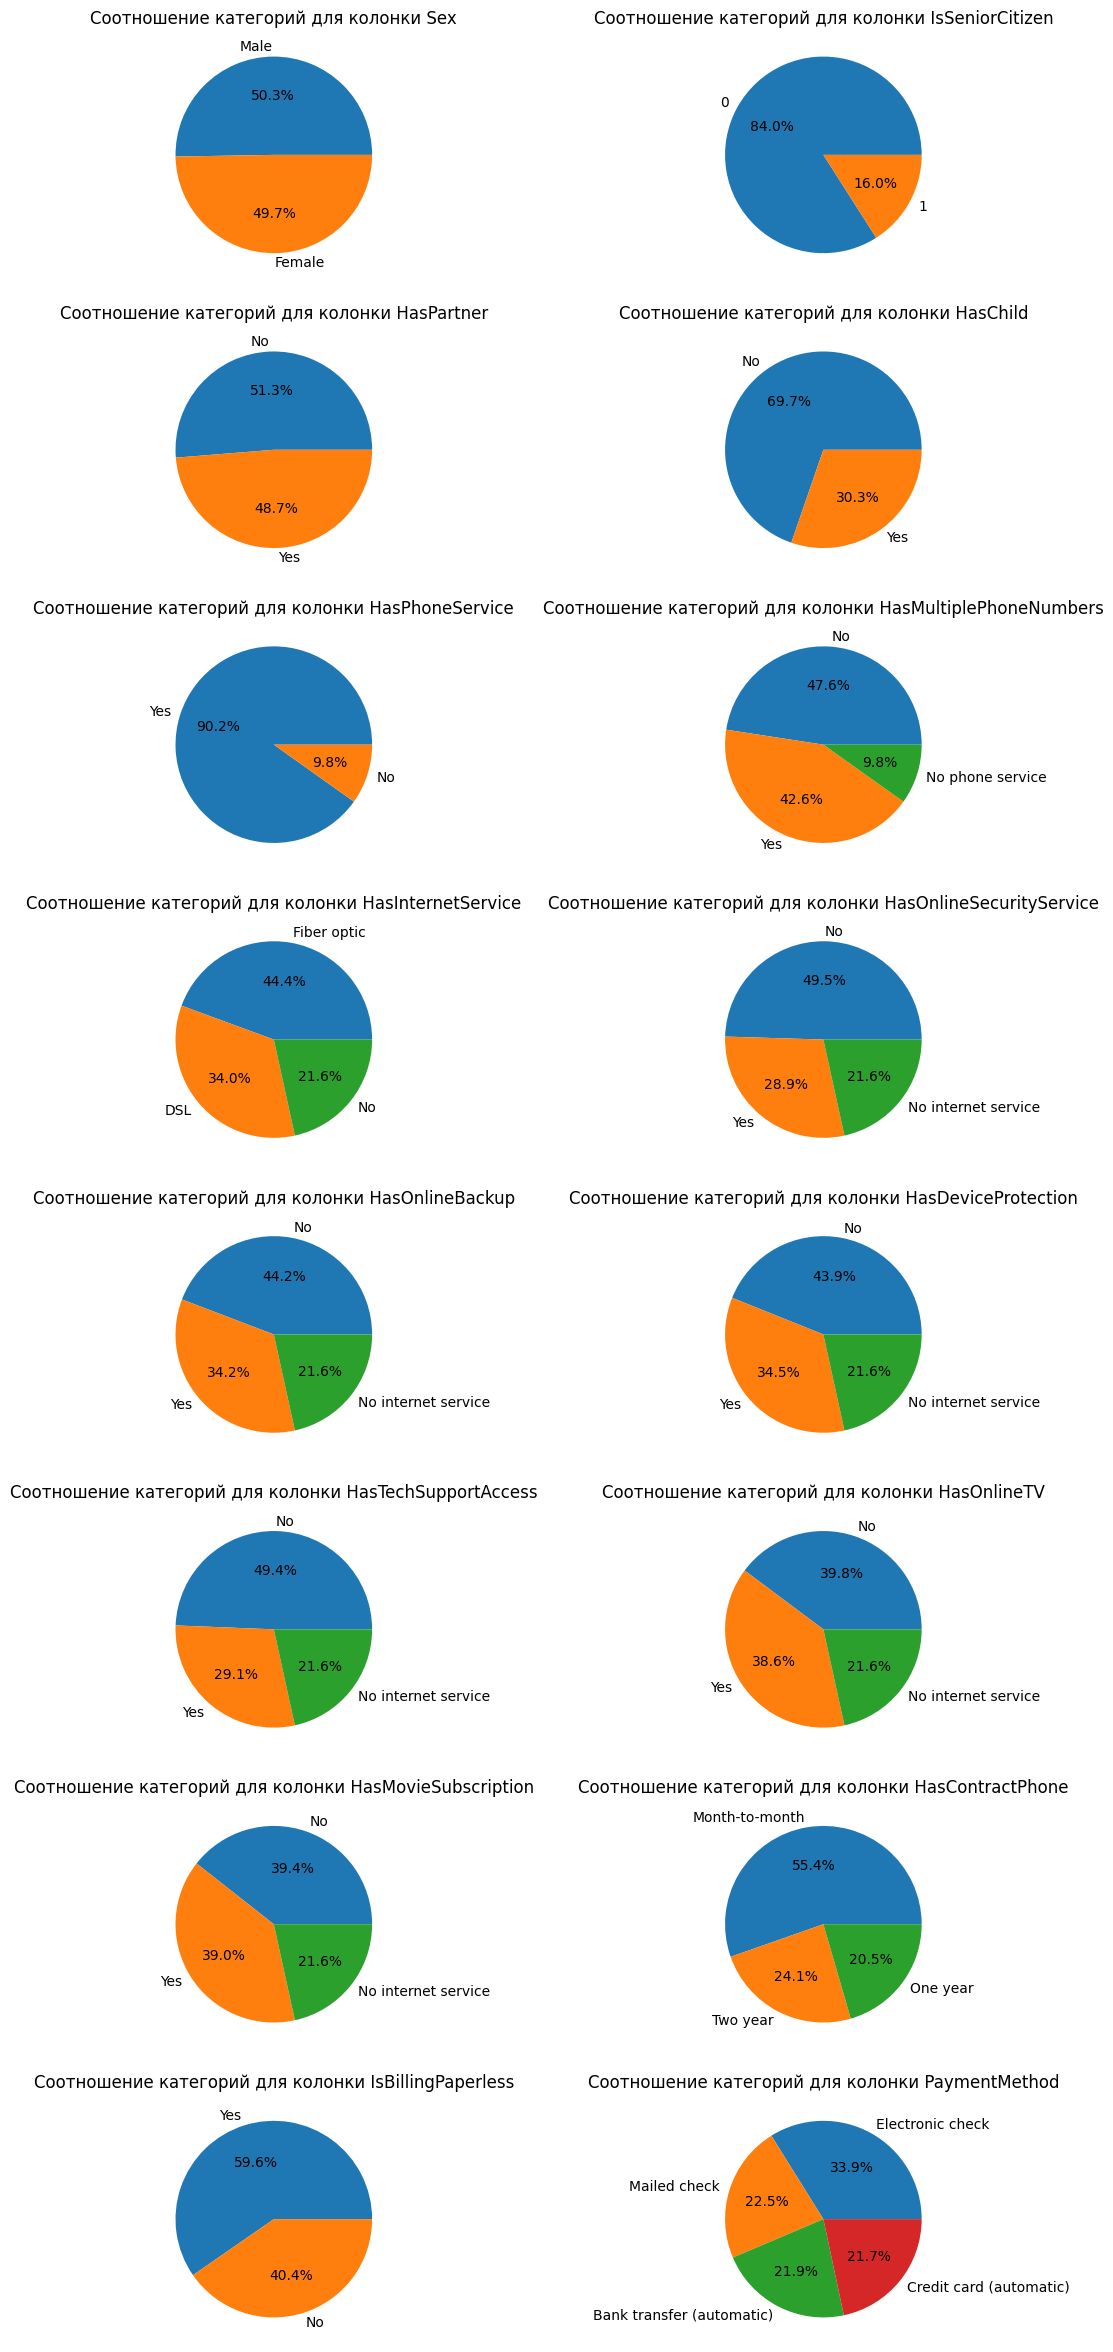

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(13, 30))
for i, col in enumerate(cat_cols):
    ax = axes[i // 2, i % 2]
    val = data[col].value_counts()
    ax.pie(val, labels = val.index, autopct='%1.1f%%')
    ax.set_title(f'Соотношение категорий для колонки {col}')
plt.show()

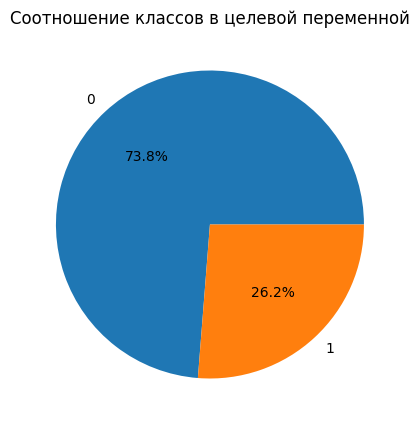

In [ ]:
targ_val = data[target_col].value_counts()
plt.pie(targ_val, labels = targ_val.index, autopct='%1.1f%%')
plt.title('Соотношение классов в целевой переменной')
plt.show()

Как можно видеть из графика, классы целевой переменной несбаллансированны: примеров класса 0 в 2,8 раз больше, чем класса 1

In [ ]:
df = data.copy()

In [ ]:
df['TotalSpent'][df['TotalSpent'].values == ' '].count()

9

In [ ]:
df['TotalSpent'][df['TotalSpent'].values == ' '].index

Int64Index([1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598], dtype='int64')

In [ ]:
df = df.drop(index=df['TotalSpent'][df['TotalSpent'].values == ' '].index)

In [ ]:
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'])

In [ ]:
for col in num_cols:
    data[col] = data[col].replace(' ', np.NAN)

In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

# Линейные модели

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer

In [ ]:
X = data[feature_cols]
y = data[target_col]

In [ ]:
num_pipe = make_column_transformer((StandardScaler(), num_cols))
cat_pipe = make_column_transformer((make_pipeline(OrdinalEncoder(),OneHotEncoder()), cat_cols))
column_pipeline = make_union(num_pipe, cat_pipe)
clf = make_pipeline(
    column_pipeline,
    LogisticRegression(max_iter=1000)
)

parameters = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
linear = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='roc_auc')

In [ ]:
linear.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('featureunion',
                                        FeatureUnion(transformer_list=[('columntransformer-1',
                                                                        ColumnTransformer(transformers=[('standardscaler',
                                                                                                         StandardScaler(),
                                                                                                         ['ClientPeriod',
                                                                                                          'MonthlySpending',
                                                                                                          'TotalSpent'])])),
                                                                       ('columntransformer-2',
                                                                        ColumnTransformer(transformers=[('pipeline',
                                                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                                                          OrdinalEncoder()...
                                                                                                          'HasInternetService',
                                                                                                          'HasOnlineSecurityService',
                                                                                                          'HasOnlineBackup',
                                                                                                          'HasDeviceProtection',
                                                                                                          'HasTechSupportAccess',
                                                                                                          'HasOnlineTV',
                                                                                                          'HasMovieSubscription',
                                                                                                          'HasContractPhone',
                                                                                                          'IsBillingPaperless',
                                                                                                          'PaymentMethod'])]))])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100]},
             scoring='roc_auc')

Лучшее качество и параметры

In [ ]:
linear.best_params_

{'logisticregression__C': 100}

In [ ]:
linear.best_score_

0.8451139235772726

# Градиентный бустинг

In [ ]:
from catboost import *

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2)

In [ ]:
param = {
            "eta": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3],
            "num_trees": [100, 500, 1000, 1500, 2000]
}
CBC = CatBoostClassifier(task_type = 'CPU')
cat_clf = GridSearchCV(estimator=CBC, param_grid=param, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
cat_clf.fit(x_train, y_train, cat_features=cat_cols)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
param = {
            'n_estimators': np.arange(190, 250, 10),
            'depth': np.arange(1, 5, 2),
            'learning_rate': np.linspace(0.05, 0.5, 10)
}
CBC = CatBoostClassifier(cat_features=cat_cols, task_type = 'CPU')
cat_clf = GridSearchCV(estimator=CBC, param_grid=param, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
cat_clf.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\Valeri\PycharmProjects\DLS\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6750825	total: 12.1ms	remaining: 2.28s
1:	learn: 0.6583065	total: 26ms	remaining: 2.44s
2:	learn: 0.6424050	total: 40ms	remaining: 2.49s
3:	learn: 0.6281061	total: 54.5ms	remaining: 2.53s
4:	learn: 0.6156739	total: 73.2ms	remaining: 2.71s
5:	learn: 0.6039711	total: 95.1ms	remaining: 2.92s
6:	learn: 0.5928005	total: 114ms	remaining: 2.98s
7:	learn: 0.5830138	total: 131ms	remaining: 2.98s
8:	learn: 0.5737903	total: 148ms	remaining: 2.97s
9:	learn: 0.5647511	total: 165ms	remaining: 2.97s
10:	learn: 0.5563712	total: 184ms	remaining: 2.99s
11:	learn: 0.5491934	total: 203ms	remaining: 3s
12:	learn: 0.5425070	total: 219ms	remaining: 2.98s
13:	learn: 0.5365336	total: 235ms	remaining: 2.95s
14:	learn: 0.5302138	total: 250ms	remaining: 2.92s
15:	learn: 0.5234236	total: 266ms	remaining: 2.89s
16:	learn: 0.5168660	total: 282ms	remaining: 2.86s
17:	learn: 0.5106793	total: 298ms	remaining: 2.85s
18:	learn: 0.5064545	total: 313ms	remaining: 2.82s
19:	learn: 0.5009271	total: 327ms	remainin

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001AACB5FAFE0>,
             n_jobs=-1,
             param_grid={'depth': array([1, 3]),
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
                         'n_estimators': array([190, 200, 210, 220, 230, 240])},
             scoring='roc_auc', verbose=10)

Лучшее качество и параметры

In [ ]:
cat_clf.best_params_

{'depth': 1, 'learning_rate': 0.05500000000000001}

In [ ]:
cat_clf.best_score_

0.8502189090909091

In [ ]:
y_pred = cat_clf.predict(x_test)

C:\Users\Valeri\PycharmProjects\DLS\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [ ]:
roc_auc_score(y_test, y_pred)

0.6911771404624383

# Предсказания

In [ ]:
clf = CatBoostClassifier(l2_leaf_reg=3.180242242411711, silent=True, random_strength=1.2423130425640145, eval_metric='AUC:hints=skip_train~false', subsample= 0.6983901315995189, max_depth=4, n_estimators=284, eta=0.04356020658096416, grow_policy='Lossguide', min_data_in_leaf=1, cat_features=cat_cols)

In [ ]:
X_test = pd.read_csv('./test.csv')

In [ ]:
X = X_test.copy()
X = X.drop(index=X['TotalSpent'][X['TotalSpent'].values == ' '].index)
X['TotalSpent'] = pd.to_numeric(X['TotalSpent'])

In [ ]:
for col in num_cols:
    X_test[col] = X_test[col].replace(' ', np.NaN)

X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'])

In [ ]:
clf.fit(x_train, y_train)

C:\Users\Valeri\PycharmProjects\DLS\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [ ]:
submission = pd.read_csv('./submission.csv', index_col='Id')

submission['Churn'] = cat_clf.predict_proba(X_test)[:, 1]

C:\Users\Valeri\PycharmProjects\DLS\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [ ]:
submission

,Churn
Id,
0,0.041012
1,0.648084
2,0.685949
3,0.020665
4,0.013046
...,...
1756,0.117285
1757,0.022085
1758,0.782986


In [ ]:
submission['Churn'].to_csv('./my_submission.csv')